# Basic Statistics

### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

### Introduction
### Descriptive Analytics for Numerical Columns
#### ● Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.
#### ●Steps:
#### Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
#### Identify numerical columns in the dataset.
#### Calculate the mean, median, mode, and standard deviation for these columns.
#### Provide a brief interpretation of these statistics.

In [1]:
import pandas as pd

In [2]:
sales=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
sales.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
numerical_cols_new = sales[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]

statistics_new = numerical_cols_new.agg(['mean', 'median', 'std'])

modes_new = numerical_cols_new.mode().iloc[0]  
statistics_new.loc['mode'] = modes_new

statistics_new


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
mode,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801


### Interpretation

#### ● Volume: The average number of units sold per transaction is 5 with a median of 4 suggesting a slightly skewed distribution.
#### ● Avg Price: The mean price is ₹10,453 but the median is ₹1,450 indicating a right-skewed distribution.
#### ● Total Sales Value: The average sales value is ₹33,812 but the median is ₹5,700 showing a large spread in sales amounts.
#### ● Discount Rate (%): The average discount is 15.16% with a relatively low standard deviation meaning most discounts are within a close range.
#### ● Discount Amount: Highly variable with an average of ₹3,346 but a median of ₹988 meaning some large discounts affect the mean.
#### ● Net Sales Value: The wide standard deviation suggests a diverse range of transactions with some very high-value sales.

## Data Visualization
#### ● Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
### ● Histograms:
#### Plot histograms for each numerical column.
#### Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.


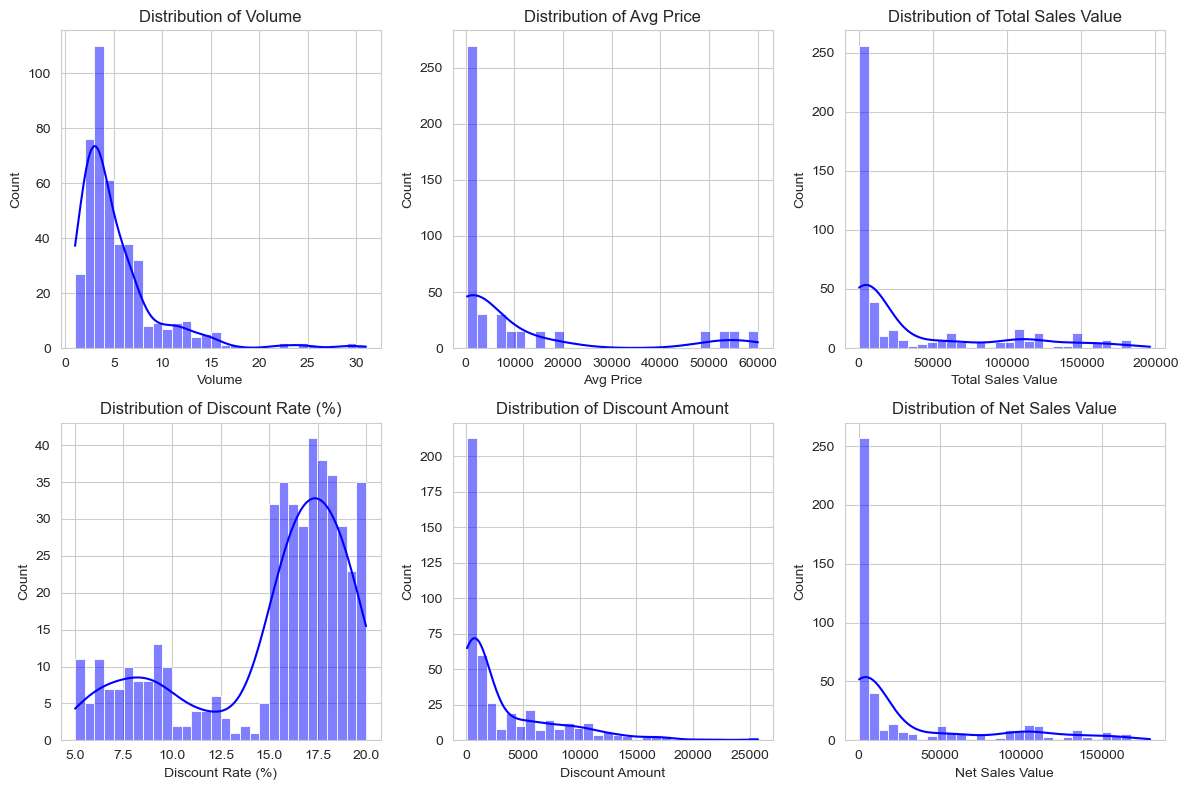

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

numerical_cols_list = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_list, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(sales[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


### Histogram Analysis & Insights:
#### Volume: Slightly right-skewed indicating most transactions involve lower unit sales with occasional high-volume sales.
#### Avg Price: Strong right skew showing that most products are lower-priced but a few high-priced items increase the mean.
#### Total Sales Value: Right-skewed meaning that most transactions are small but some high-value transactions drive up the total.
#### Discount Rate (%): Fairly symmetric distribution with a peak around 15% suggesting most discounts fall in this range.
#### Discount Amount: Right-skewed indicating that while many discounts are small some are significantly high.
#### Net Sales Value: Shows a broad distribution with a right skew meaning while most transactions are small some generate high revenue.    

### ● Boxplots:
#### Create boxplots for numerical variables to identify outliers and the interquartile range.
#### Discuss any findings, such as extreme values or unusual distributions.


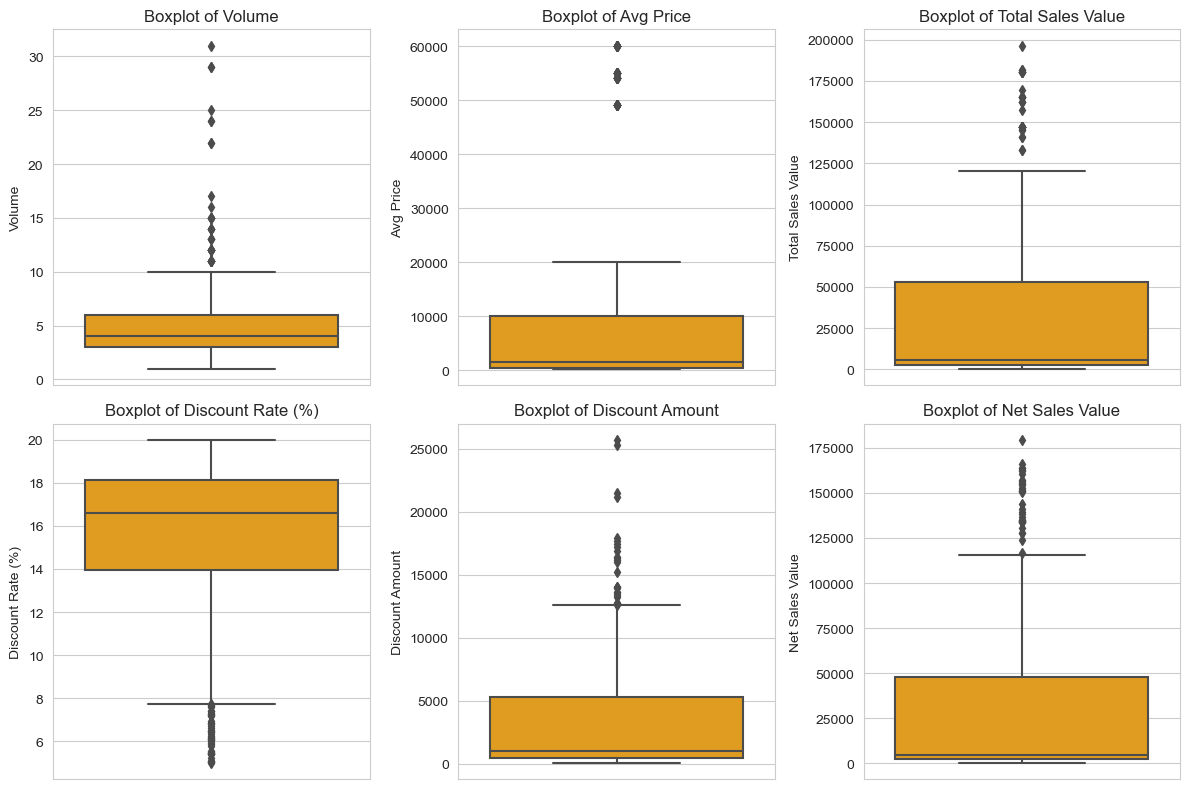

In [6]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols_list, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(y=sales[col], color='orange')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


### Boxplot Analysis & Findings:
#### Volume: Some transactions have significantly high volumes indicating potential outliers.
#### Avg Price: Shows extreme outliers confirming that a few very expensive products skew the distribution.
#### Total Sales Value: A wide spread with clear outliers suggesting that while most sales are moderate some transactions are exceptionally high.
#### Discount Rate (%): Appears mostly within a normal range with few extreme values.
#### Discount Amount: Right-skewed with some large outliers indicating that some high-value discounts significantly affect the dataset.
#### Net Sales Value: A large range with outliers meaning a few transactions generate substantially more revenue.

## ● Bar Chart Analysis for Categorical Column:
#### Identify categorical columns in the dataset.
#### Create bar charts to visualize the frequency or count of each category.
#### Analyze the distribution of categories and provide insights.


In [7]:
categorical_cols = sales.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Date', 'Day']]

categorical_cols

['SKU', 'City', 'BU', 'Brand', 'Model']

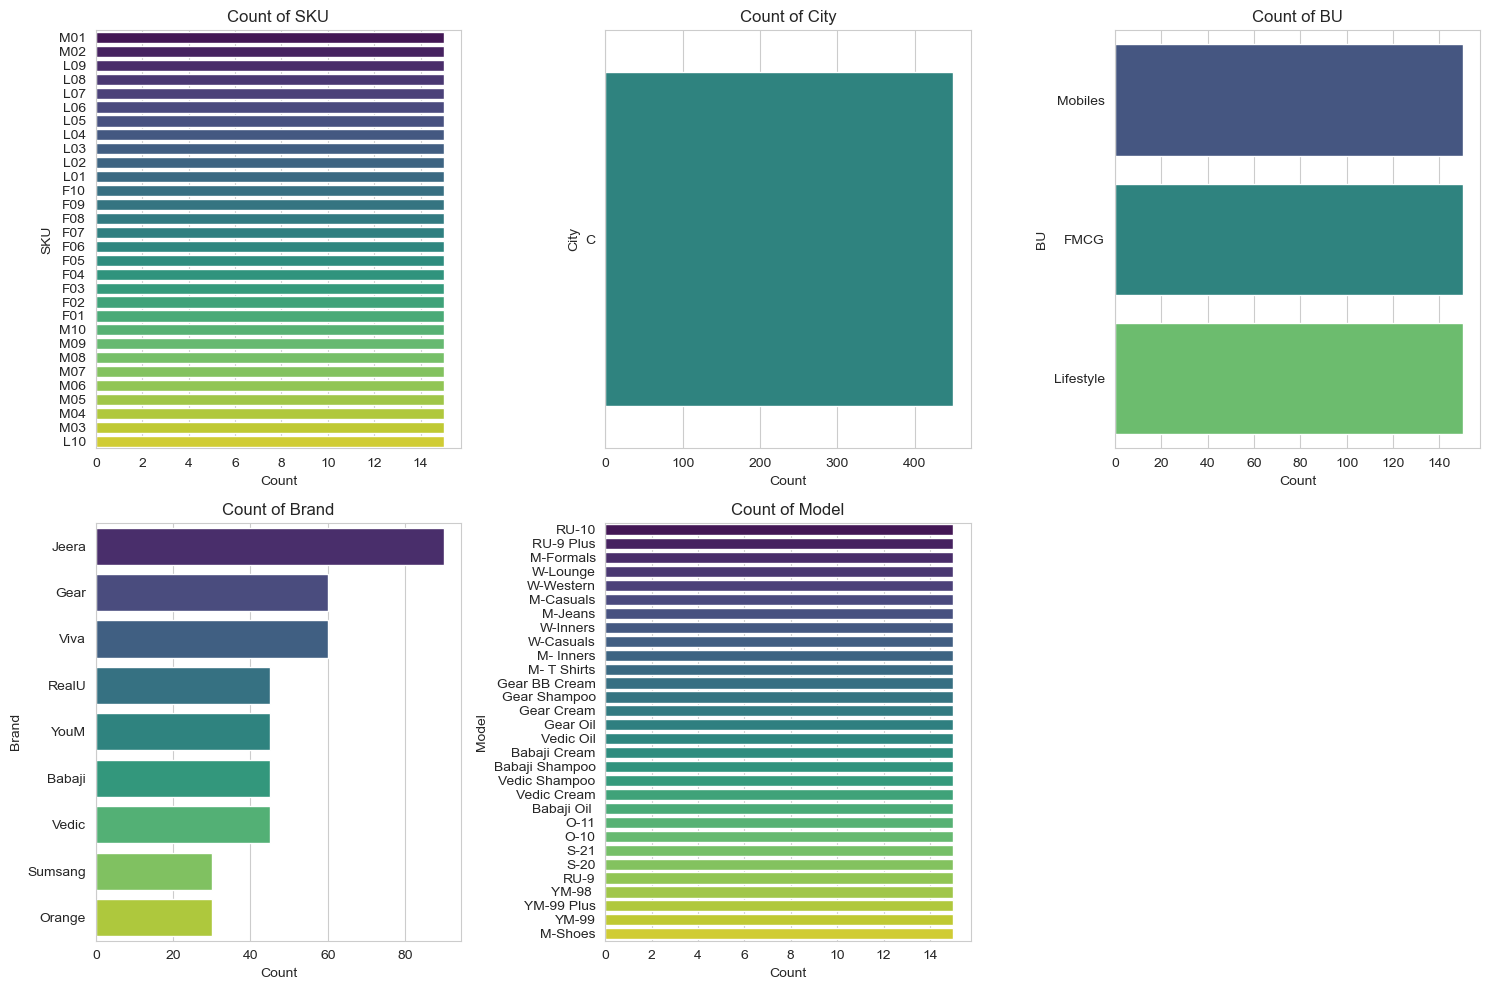

In [8]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=sales[col], order=sales[col].value_counts().index, palette='viridis')
    plt.title(f"Count of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Bar Chart Analysis & Insights:
#### SKU: Some SKUs are sold significantly more often than others suggesting best selling products.
#### City: Sales distribution varies across cities with some locations contributing more sales than others.
#### BU (Business Unit): Some business units dominate sales which may indicate a focus on specific market segments.
#### Brand: A few brands are leading in sales while others have lower demand.
#### Model: Certain models are significantly more popular hinting at customer preferences.

## Standardization of Numerical Variables
### ● Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
### ● Steps:
#### Explain the concept of standardization (z-score normalization).
#### Standardize the numerical columns using the formula: z=x-mu/sigma
#### Show before and after comparisons of the data distributions.


### Standardization transforms numerical variables to have a mean of 0 and a standard deviation of 1 using the formula:

### 𝑍=X-𝜇/𝜎
 
#### where:

#### X is the original value,
#### μ is the mean of the column,
#### σ is the standard deviation.
#### This ensures that variables are on a comparable scale making them more suitable for machine learning models and statistical analysis.

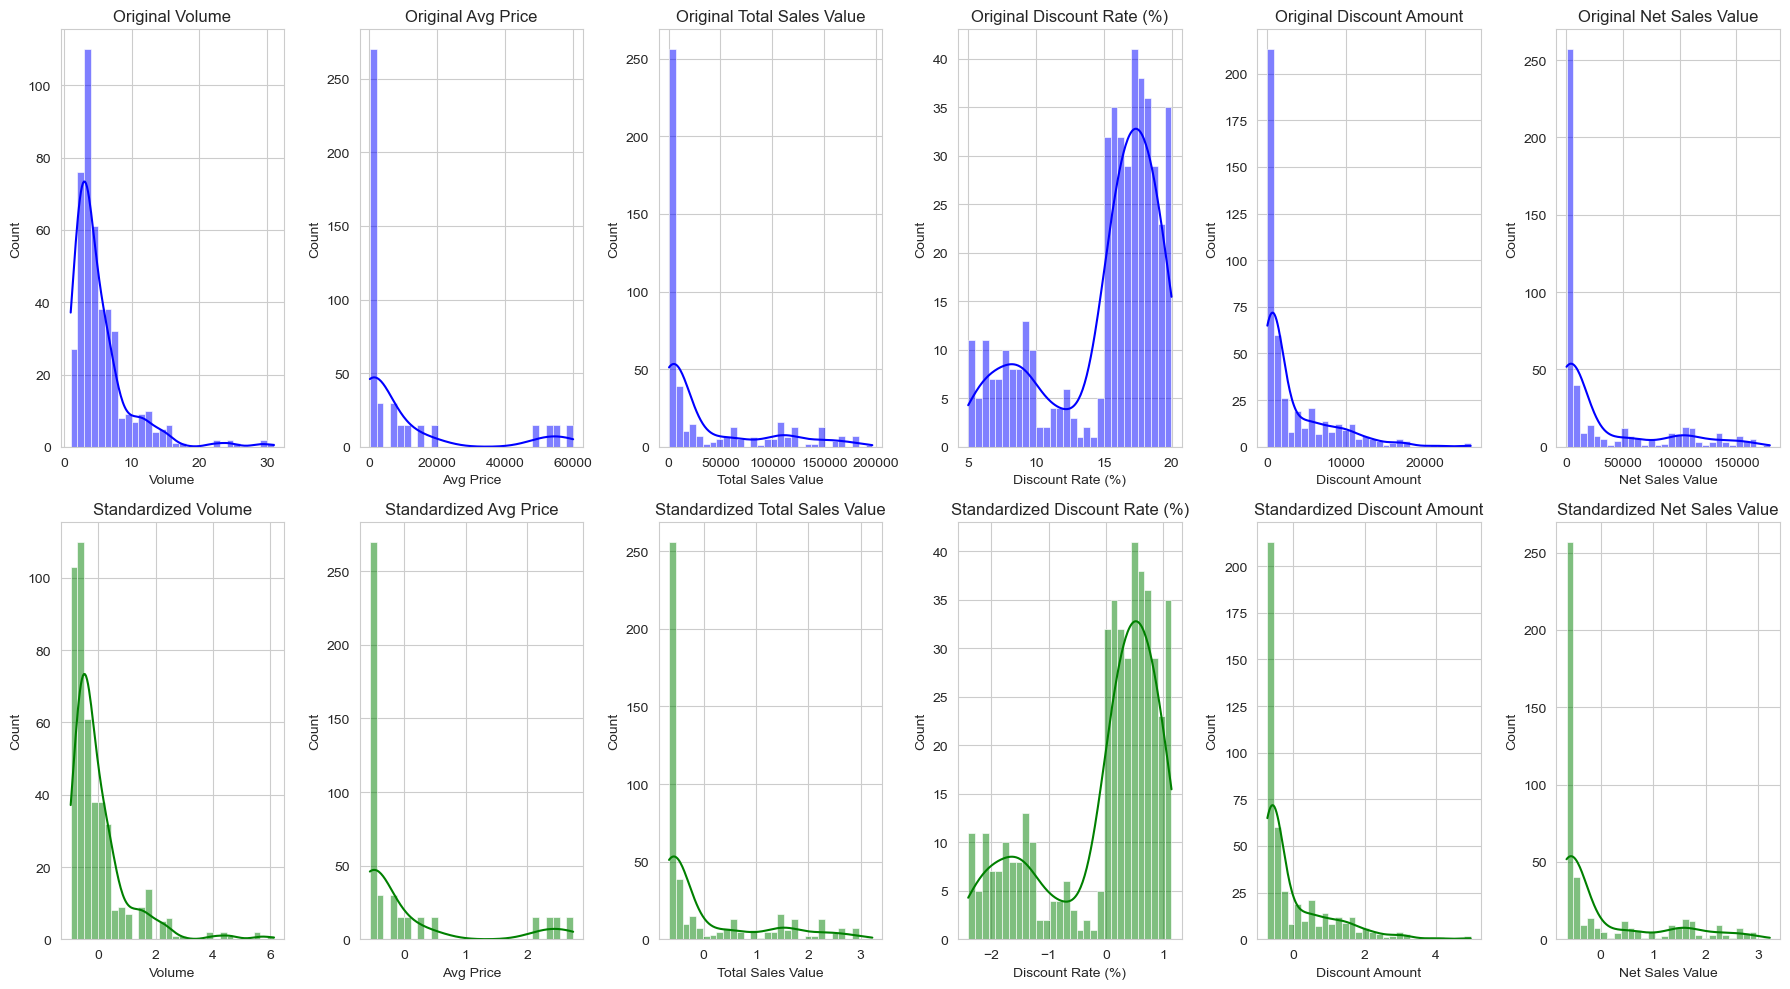

In [9]:
from scipy.stats import zscore

df_standardized = sales[numerical_cols_list].apply(zscore)

fig, axes = plt.subplots(2, len(numerical_cols_list), figsize=(18, 10))

for i, col in enumerate(numerical_cols_list):
    sns.histplot(sales[col], bins=30, kde=True, ax=axes[0, i], color='blue')
    axes[0, i].set_title(f"Original {col}")

for i, col in enumerate(numerical_cols_list):
    sns.histplot(df_standardized[col], bins=30, kde=True, ax=axes[1, i], color='green')
    axes[1, i].set_title(f"Standardized {col}")

plt.tight_layout()
plt.show()


## Conversion of Categorical Data into Dummy Variables
### ● Objective: To transform categorical variables into a format that can be provided to ML algorithms.
### ● Steps:
#### Discuss the need for converting categorical data into dummy variables (one-hot encoding).
#### Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
#### Display a portion of the transformed dataset.


##### Machine learning algorithms generally require numerical input. Since categorical variables contain text labels, they must be converted into a numerical format.
##### One-hot encoding (dummy variables) achieves this by creating separate binary columns (0 or 1) for each unique category.

In [10]:
df_encoded = pd.get_dummies(sales, columns=categorical_cols, drop_first=True) 

df_encoded.head()


,Date,Day,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,SKU_F02,SKU_F03,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,Thursday,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01-04-2021,Thursday,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,...,False,False,False,False,False,False,False,False,False,False
2,01-04-2021,Thursday,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,...,False,False,False,False,False,False,False,False,True,False
3,01-04-2021,Thursday,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,...,False,False,False,False,False,False,False,False,False,True
4,01-04-2021,Thursday,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,...,False,False,False,False,False,False,False,True,False,False
